Understand dataset structure and content

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Reviews.csv')

# Display basic information about the DataFrame (columns, data types, non-null values)
print("DataFrame Info:")
df.info()

# Display the size of the DataFrame (number of rows, number of columns)
print("\nDataFrame Shape:")
print(df.shape)

# Display the first 5 sample records
print("\nFirst 5 Rows of the DataFrame:")
display(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB

DataFrame Shape:
(568454, 10)

First 5 Rows of the DataFrame:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Select columns required for NLP and prediction.


In [3]:
# Select the desired columns: 'Summary', 'Text', and 'Score'
df = df[['Summary', 'Text', 'Score']]

# Display the first 5 rows of the updated DataFrame
print("\nFirst 5 Rows of the DataFrame after column selection:")
display(df.head())

# Display information about the updated DataFrame to confirm column changes
print("\nDataFrame Info after column selection:")
df.info()


First 5 Rows of the DataFrame after column selection:


,Summary,Text,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,Cough Medicine,If you are looking for the secret ingredient i...,2
4,Great taffy,Great taffy at a great price. There was a wid...,5



DataFrame Info after column selection:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Summary  568427 non-null  object
 1   Text     568454 non-null  object
 2   Score    568454 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


Remove incomplete reviews.

In [4]:
# Remove rows where 'Summary' or 'Text' columns have missing values
df.dropna(subset=['Summary', 'Text'], inplace=True)

# Display information about the DataFrame after dropping nulls to confirm changes
print("\nDataFrame Info after dropping rows with missing Summary or Text:")
df.info()

# Display the new shape of the DataFrame
print("\nDataFrame Shape after dropping rows with missing Summary or Text:")
print(df.shape)


display(df.head())


DataFrame Info after dropping rows with missing Summary or Text:
<class 'pandas.core.frame.DataFrame'>
Index: 568427 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Summary  568427 non-null  object
 1   Text     568427 non-null  object
 2   Score    568427 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 17.3+ MB

DataFrame Shape after dropping rows with missing Summary or Text:
(568427, 3)


,Summary,Text,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,Cough Medicine,If you are looking for the secret ingredient i...,2
4,Great taffy,Great taffy at a great price. There was a wid...,5


Normalize word formats.

In [5]:
# Convert 'Summary' and 'Text' columns to lowercase
df['Summary'] = df['Summary'].str.lower()
df['Text'] = df['Text'].str.lower()

# Display the first few rows to verify the change
print("\nFirst 5 Rows of the DataFrame after converting text to lowercase:")
display(df.head())


First 5 Rows of the DataFrame after converting text to lowercase:


,Summary,Text,Score
0,good quality dog food,i have bought several of the vitality canned d...,5
1,not as advertised,product arrived labeled as jumbo salted peanut...,1
2,"""delight"" says it all",this is a confection that has been around a fe...,4
3,cough medicine,if you are looking for the secret ingredient i...,2
4,great taffy,great taffy at a great price. there was a wid...,5


Removing noisy symbols from text.

In [6]:
import re
import string

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to 'Summary' and 'Text' columns
df['Summary'] = df['Summary'].apply(clean_text)
df['Text'] = df['Text'].apply(clean_text)

# Display the first few rows to verify the changes
print("\nFirst 5 Rows of the DataFrame after text cleaning:")
display(df.head(10))


First 5 Rows of the DataFrame after text cleaning:


,Summary,Text,Score
0,good quality dog food,i have bought several of the vitality canned d...,5
1,not as advertised,product arrived labeled as jumbo salted peanut...,1
2,delight says it all,this is a confection that has been around a fe...,4
3,cough medicine,if you are looking for the secret ingredient i...,2
4,great taffy,great taffy at a great price there was a wide ...,5
5,nice taffy,i got a wild hair for taffy and ordered this f...,4
6,great just as good as the expensive brands,this saltwater taffy had great flavors and was...,5
7,wonderful tasty taffy,this taffy is so good it is very soft and chew...,5
8,yay barley,right now im mostly just sprouting this so my ...,5
9,healthy dog food,this is a very healthy dog food good for their...,5


In [7]:
display(df.head(20))

,Summary,Text,Score
0,good quality dog food,i have bought several of the vitality canned d...,5
1,not as advertised,product arrived labeled as jumbo salted peanut...,1
2,delight says it all,this is a confection that has been around a fe...,4
3,cough medicine,if you are looking for the secret ingredient i...,2
4,great taffy,great taffy at a great price there was a wide ...,5
5,nice taffy,i got a wild hair for taffy and ordered this f...,4
6,great just as good as the expensive brands,this saltwater taffy had great flavors and was...,5
7,wonderful tasty taffy,this taffy is so good it is very soft and chew...,5
8,yay barley,right now im mostly just sprouting this so my ...,5
9,healthy dog food,this is a very healthy dog food good for their...,5


Removing non-informative words.

In [9]:

!pip install nltk
import nltk
from nltk.corpus import stopwords
# Download the stopwords dataset
try:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    print("NLTK stopwords downloaded successfully!")
except Exception as e:
    print(f"Error downloading NLTK stopwords: {e}")
def remove_stopwords(text):
    if not isinstance(text, str):  # Handle non-string values
        return ''
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])
# Apply the function to 'Summary' and 'Text' columns
df['Summary'] = df['Summary'].apply(remove_stopwords)
df['Text'] = df['Text'].apply(remove_stopwords)
# Display the first few rows to verify the changes
print("\nFirst 5 Rows of the DataFrame after removing stopwords:")
display(df.head())


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 9.4 MB/s  0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vedant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


NLTK stopwords downloaded successfully!

First 5 Rows of the DataFrame after removing stopwords:


,Summary,Text,Score
0,good quality dog food,bought several vitality canned dog food produc...,5
1,advertised,product arrived labeled jumbo salted peanutsth...,1
2,delight says,confection around centuries light pillowy citr...,4
3,cough medicine,looking secret ingredient robitussin believe f...,2
4,great taffy,great taffy great price wide assortment yummy ...,5


Reduce words to base form.

In [16]:
# Install spaCy and download the English model
!pip install -U spacy
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     - 0 bytes ? 0:00:00
     - 0 bytes ? 0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Wheel 'en-core-web-sm' located at C:\Users\Vedant\AppData\Local\Temp\pip-unpack-n53ds9n7\en_core_web_sm-3.8.0-py3-none-any.whl is invalid.


In [ ]:
import spacy
import pandas as pd

# Load the English language model
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    # If model is not found, download it
    import subprocess
    subprocess.run(['python', '-m', 'spacy', 'download', 'en_core_web_sm'], check=True)
    nlp = spacy.load('en_core_web_sm')

def lemmatize_with_spacy(text):
    if not isinstance(text, str) or not text.strip():
        return ''
    
    # Process the text with spaCy
    doc = nlp(text.lower())
    
    # Extract lemmas and filter out stopwords and punctuation
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return ' '.join(lemmas)


# Apply to a small sample of your dataframe
df_sample = df.head().copy()
df_sample['Text_Lemmatized'] = df_sample['Text'].astype(str).apply(lemmatize_with_spacy)
display(df_sample[['Text', 'Text_Lemmatized']])

,Text,Text_Lemmatized
0,bought several vitality canned dog food produc...,buy vitality can dog food product find good qu...
1,product arrived labeled jumbo salted peanutsth...,product arrive label jumbo salt peanutsthe pea...
2,confection around centuries light pillowy citr...,confection century light pillowy citrus gelati...
3,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
4,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


In [20]:
# First, let's process the data in batches to avoid memory issues
def process_in_batches(df, column, batch_size=1000):
    """
    Process a dataframe column in batches using spaCy's nlp.pipe for better performance
    """
    processed_texts = []
    
    # Process in batches
    for doc in nlp.pipe(df[column].astype(str), batch_size=batch_size, n_process=-1):
        # Get lemmas, remove stopwords and punctuation
        lemmas = [token.lemma_.lower() for token in doc 
                 if not token.is_stop and not token.is_punct and not token.is_space]
        processed_texts.append(' '.join(lemmas))
    
    return processed_texts

# Apply to both 'Summary' and 'Text' columns
print("Processing 'Summary' column...")
df['Summary_Lemmatized'] = process_in_batches(df, 'Summary')

print("Processing 'Text' column...")
df['Text_Lemmatized'] = process_in_batches(df, 'Text')

# Display the results
print("\nProcessing complete! Here are the first 5 rows with lemmatized text:")
display(df[['Summary', 'Summary_Lemmatized', 'Text', 'Text_Lemmatized']].head())

# Optional: Save the processed data to a new CSV file
# df.to_csv('amazon_reviews_lemmatized.csv', index=False) 

Processing 'Summary' column...
Processing 'Text' column...

Processing complete! Here are the first 5 rows with lemmatized text:


,Summary,Summary_Lemmatized,Text,Text_Lemmatized
0,good quality dog food,good quality dog food,bought several vitality canned dog food produc...,buy vitality can dog food product find good qu...
1,advertised,advertise,product arrived labeled jumbo salted peanutsth...,product arrive label jumbo salt peanutsthe pea...
2,delight says,delight say,confection around centuries light pillowy citr...,confection century light pillowy citrus gelati...
3,cough medicine,cough medicine,looking secret ingredient robitussin believe f...,look secret ingredient robitussin believe find...
4,great taffy,great taffy,great taffy great price wide assortment yummy ...,great taffy great price wide assortment yummy ...


Combine Summary and Review Text:
Improve semantic information

In [21]:
# Combine 'Summary' and 'Text' into a single 'Review' column
# This provides more context by including both the summary and full text
df['Review'] = df['Summary_Lemmatized'] + ' ' + df['Text_Lemmatized']

print("\nFirst 3 rows with the new 'Review' column:")
display(df[['Summary_Lemmatized', 'Text_Lemmatized', 'Review']].head(3))

# Show the shape of the dataframe to confirm the new column was added
print(f"\nDataFrame shape after adding 'Review' column: {df.shape}")


First 3 rows with the new 'Review' column:


,Summary_Lemmatized,Text_Lemmatized,Review
0,good quality dog food,buy vitality can dog food product find good qu...,good quality dog food buy vitality can dog foo...
1,advertise,product arrive label jumbo salt peanutsthe pea...,advertise product arrive label jumbo salt pean...
2,delight say,confection century light pillowy citrus gelati...,delight say confection century light pillowy c...



DataFrame shape after adding 'Review' column: (568427, 6)


In [22]:
display(df.head())

,Summary,Text,Score,Review,Summary_Lemmatized,Text_Lemmatized
0,good quality dog food,bought several vitality canned dog food produc...,5,good quality dog food buy vitality can dog foo...,good quality dog food,buy vitality can dog food product find good qu...
1,advertised,product arrived labeled jumbo salted peanutsth...,1,advertise product arrive label jumbo salt pean...,advertise,product arrive label jumbo salt peanutsthe pea...
2,delight says,confection around centuries light pillowy citr...,4,delight say confection century light pillowy c...,delight say,confection century light pillowy citrus gelati...
3,cough medicine,looking secret ingredient robitussin believe f...,2,cough medicine look secret ingredient robituss...,cough medicine,look secret ingredient robitussin believe find...
4,great taffy,great taffy great price wide assortment yummy ...,5,great taffy great taffy great price wide assor...,great taffy,great taffy great price wide assortment yummy ...


Create Sentiment Labels: Convert ratings into sentiment categories.


In [23]:
# Map numerical scores to sentiment labels
# 1-2: Negative, 3: Neutral, 4-5: Positive
df['Sentiment'] = df['Score'].apply(
    lambda x: 'Negative' if x <= 2 else 'Neutral' if x == 3 else 'Positive'
)

# Display value counts to verify the distribution
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

# Show a sample of the mapping
print("\nSample of Score to Sentiment mapping:")
display(df[['Score', 'Sentiment']].sample(10).sort_values('Score'))


Sentiment Distribution:
Sentiment
Positive    443777
Negative     82012
Neutral      42638
Name: count, dtype: int64

Sample of Score to Sentiment mapping:


,Score,Sentiment
564109,4,Positive
474936,5,Positive
400464,5,Positive
90333,5,Positive
239579,5,Positive
440581,5,Positive
192193,5,Positive
482106,5,Positive
375224,5,Positive
486506,5,Positive


TF-IDF Vectorization for Sentiment Model: Convert text into numeric form
and
Train-Test Split (Sentiment Model): Prepare data for sentiment training.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
# max_features limits the number of features (words) to the top 5000 most frequent
# min_df ignores terms that appear in less than 5 documents
# max_df ignores terms that appear in more than 90% of documents
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit number of features
    min_df=5,           # Ignore terms that appear in less than 5 documents
    max_df=0.9,         # Ignore terms that appear in more than 90% of documents
    ngram_range=(1, 2)  # Consider both unigrams and bigrams
)

# Fit and transform the review text to TF-IDF features
X = tfidf.fit_transform(df['Review'])
y = df['Sentiment']  # Target variable

# Display the shape of the TF-IDF matrix
print(f"TF-IDF Matrix Shape: {X.shape}")
print(f"Number of unique words/ngrams: {X.shape[1]}")

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=8, stratify=y
)

# Display the shape of the training and testing sets
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Show the distribution of classes in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

TF-IDF Matrix Shape: (568427, 5000)
Number of unique words/ngrams: 5000

Training set size: 454741 samples
Testing set size: 113686 samples

Class distribution in training set:
Sentiment
Positive    0.78071
Negative    0.14428
Neutral     0.07501
Name: proportion, dtype: float64

Class distribution in test set:
Sentiment
Positive    0.780712
Negative    0.144275
Neutral     0.075014
Name: proportion, dtype: float64


Train Sentiment Classification Model: Predict sentiment categories.

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
print("Training Logistic Regression model...")
logreg = LogisticRegression(
    max_iter=1000,      # Increased for convergence
    class_weight='balanced',  # Handles class imbalance
    random_state=8,
    n_jobs=-1          # Uses all CPU cores
)

# Train the model
logreg.fit(X_train, y_train)
print("Model training completed!")

# You can access the trained model later using the 'logreg' variable

Training Logistic Regression model...
Model training completed!


Evaluate Sentiment Model: Measure sentiment prediction accuracy.

Model Evaluation Metrics:
Accuracy:  0.8039
Precision: 0.8758
Recall:    0.8039
F1-Score:  0.8297

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.76      0.71     16402
     Neutral       0.28      0.65      0.39      8528
    Positive       0.97      0.83      0.89     88756

    accuracy                           0.80    113686
   macro avg       0.64      0.74      0.67    113686
weighted avg       0.88      0.80      0.83    113686



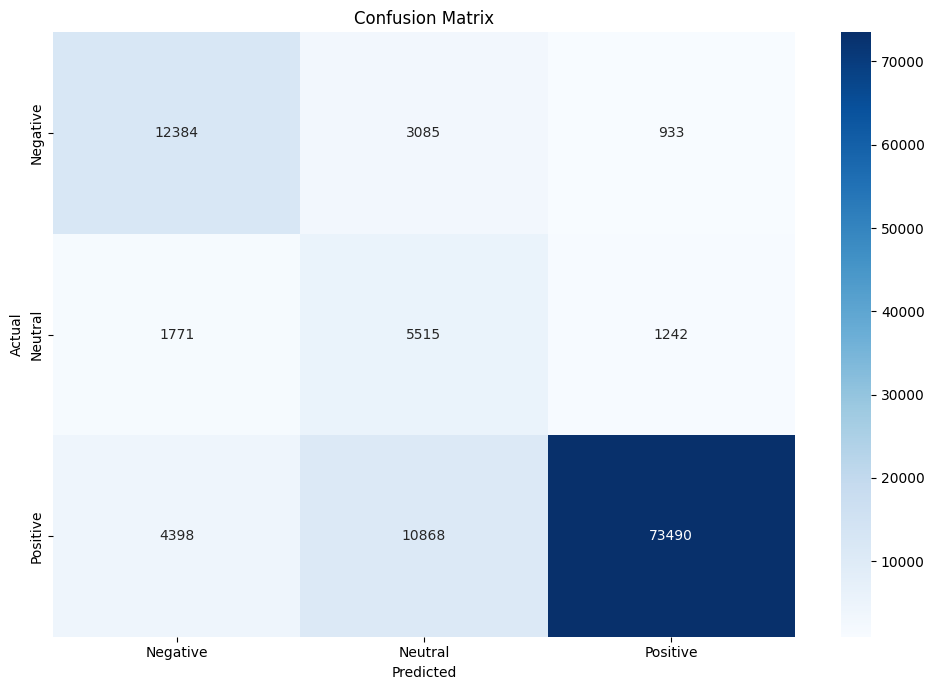

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Create and display confusion matrix
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logreg.classes_, 
            yticklabels=logreg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Key Observations:

Positive Class Performance:
Excellent at identifying Positive reviews (73,490 correct)
Some confusion with Neutral (10,868 misclassified as Neutral)
Negative Class Performance:
Decent at identifying Negative reviews (12,384 correct)
Tends to confuse Negative with Neutral (3,085 cases)
Neutral Class Challenges:
Most challenging class to predict (only 5,515 correct)
Often confused with both Negative (1,771) and Positive (1,242) classes

Performance Summary:

Best at: Identifying Positive reviews
Moderate at: Identifying Negative reviews
Struggles with: Correctly identifying Neutral reviews
This pattern is common in sentiment analysis, where neutral reviews often contain mixed signals that can be confused with either positive or negative sentiment.

Generate Predicted Sentiment Feature: Create sentiment feature for rating model.

In [27]:
# Predict sentiment for all reviews in the dataset
print("Predicting sentiment for all reviews...")
df['Predicted_Sentiment'] = logreg.predict(X)  # X contains TF-IDF features for all reviews

# Display the distribution of predicted sentiments
print("\nDistribution of Predicted Sentiments:")
print(df['Predicted_Sentiment'].value_counts())

# Show a sample of the original and predicted sentiments
print("\nSample of original vs predicted sentiments:")
display(df[['Sentiment', 'Predicted_Sentiment']].sample(10))

Predicting sentiment for all reviews...

Distribution of Predicted Sentiments:
Predicted_Sentiment
Positive    377637
Neutral      98249
Negative     92541
Name: count, dtype: int64

Sample of original vs predicted sentiments:


,Sentiment,Predicted_Sentiment
267445,Positive,Positive
219051,Positive,Positive
63463,Positive,Neutral
333466,Positive,Positive
420741,Positive,Neutral
94518,Positive,Positive
549941,Negative,Neutral
275962,Negative,Negative
33426,Neutral,Neutral
347328,Positive,Positive


Encode Sentiment Numerically: Prepare sentiment for ML model input.

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the sentiment labels
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Create a mapping dictionary for reference
sentiment_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", sentiment_mapping)

# Display the first few rows with the encoded labels
print("\nSample of encoded sentiment labels:")
display(df[['Sentiment', 'Sentiment_Encoded']].head())

Label Encoding Mapping: {'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}

Sample of encoded sentiment labels:


,Sentiment,Sentiment_Encoded
0,Positive,2
1,Negative,0
2,Positive,2
3,Negative,0
4,Positive,2


1. Prepare Rating Model Features: Create final input features for rating prediction.
2. Train-Test Split (Rating Model)
3. Train Rating Model
4. Model Evaluation

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy import sparse
import numpy as np

# 1. Encode the predicted sentiment
sentiment_encoder = LabelEncoder()
df['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df['Predicted_Sentiment'])

# 2. Get the TF-IDF features (X_tfidf is already defined from earlier)
# 3. Create feature matrix by combining TF-IDF and sentiment
X_combined = sparse.hstack([
    X,  # Your existing TF-IDF features
    df[['Sentiment_Encoded']].values  # Add encoded sentiment as a feature
])

# 4. Target variable (original ratings 1-5)
y_ratings = df['Score'].astype(int) - 1  # Convert to 0-4 for modeling

# 5. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, 
    y_ratings,
    test_size=0.2,
    random_state=8,
    stratify=y_ratings
)

# 6. Train the rating prediction model
print("Training rating prediction model...")
rating_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    class_weight='balanced',
    random_state=8,
    n_jobs=-1
)
rating_model.fit(X_train, y_train)

# 7. Make predictions
y_pred = rating_model.predict(X_test)


Training rating prediction model...


c:\Users\Vedant\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Evaluation using accuracy_score, weighted_f1, confusion matrix, classification report

Overall Accuracy: 0.6580
Weighted F1 Score: 0.6828

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.70      0.65     10454
           2       0.31      0.48      0.38      5949
           3       0.34      0.49      0.40      8527
           4       0.35      0.49      0.41     16131
           5       0.91      0.72      0.81     72625

    accuracy                           0.66    113686
   macro avg       0.51      0.58      0.53    113686
weighted avg       0.73      0.66      0.68    113686



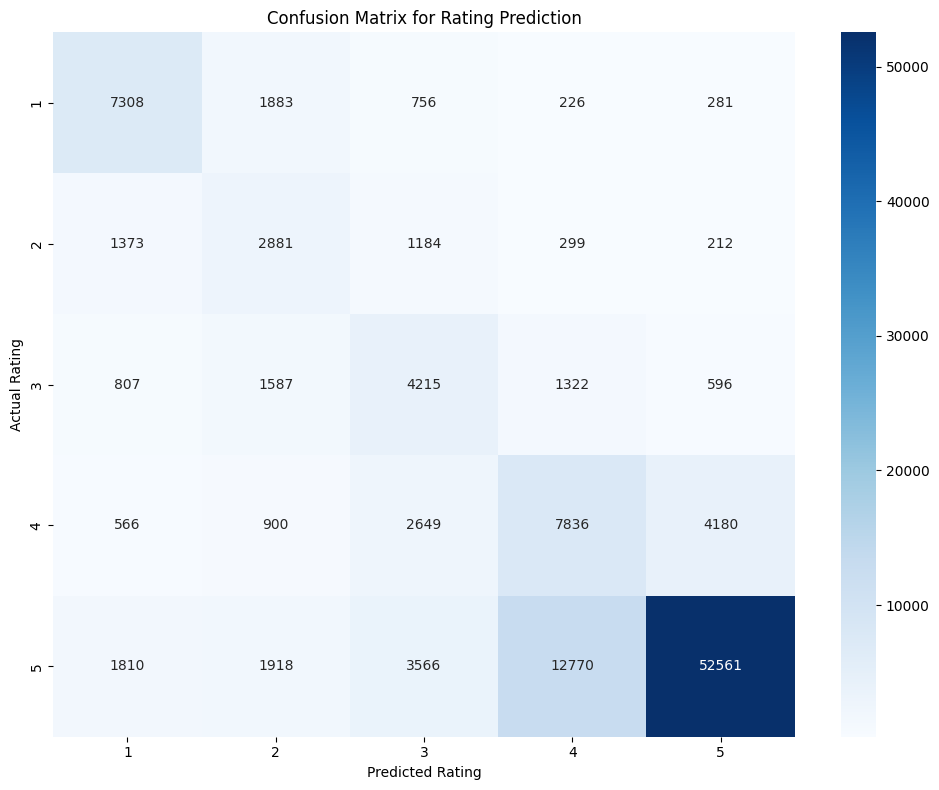

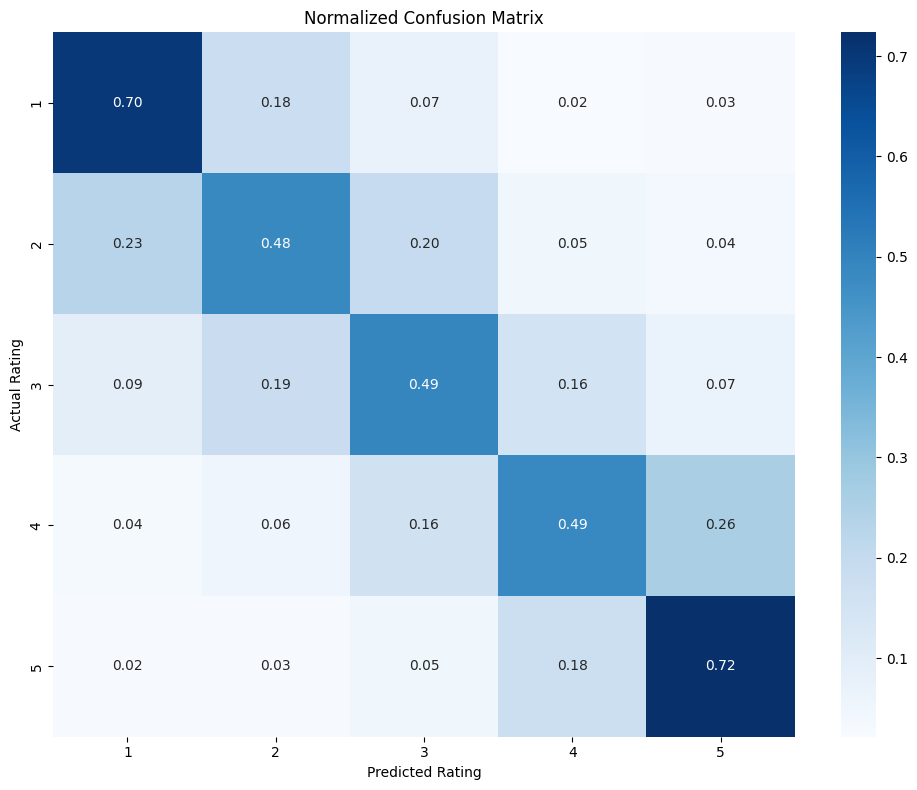


Found 38885 misclassified reviews
Sample of misclassified reviews:

True Rating: 5, Predicted: 4
Predicted Sentiment: Positive
Review Text:
im learning latin american south american coffees distinct coffee caramelish finish peets coffee fanatics learned weavers roaster roaster peets hooked already reviewd french organic blend must say cof...

True Rating: 5, Predicted: 4
Predicted Sentiment: Positive
Review Text:
best chips ever eaten everyone family loves sweet spicy crispyreally good delivery perfect crushed chips fantastic overall...

True Rating: 4, Predicted: 2
Predicted Sentiment: Negative
Review Text:
normally love earths best products son however tonight id given half jar thought would try since new flavor realized little pieces soft shredded plastic appalled first child dont experience kind thing...


In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Make predictions on test set
y_pred = rating_model.predict(X_test)

# 2. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
weighted_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}\n")

# 3. Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4', '5'], zero_division=0))

# 4. Confusion matrix with better visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])

plt.title('Confusion Matrix for Rating Prediction')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.tight_layout()
plt.show()

# 5. Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.tight_layout()
plt.show()

# 6. Analyze common misclassifications
# Convert sparse matrix to array for boolean indexing
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
misclassified_indices = np.where(y_test_array != y_pred)[0]

if len(misclassified_indices) > 0:
    print(f"\nFound {len(misclassified_indices)} misclassified reviews")
    print("Sample of misclassified reviews:")
    
    # Get the original dataframe indices
    test_indices = X_test.indices if hasattr(X_test, 'indices') else np.arange(len(X_test))
    
    # Show a few examples
    sample_size = min(3, len(misclassified_indices))
    for i in range(sample_size):
        idx = misclassified_indices[i]
        original_idx = test_indices[idx] if hasattr(X_test, 'indices') else idx
        
        print(f"\nTrue Rating: {y_test_array[idx]+1}, Predicted: {y_pred[idx]+1}")
        print(f"Predicted Sentiment: {df.iloc[original_idx]['Predicted_Sentiment']}")
        print("Review Text:")
        print(df.iloc[original_idx]['Text'][:200] + "...")  # Show first 200 chars
else:
    print("No misclassifications found!")

Compare with Direct Rating Prediction (Optional): Show benefit of sentiment-based pipeline.


Result Visualization: Display insights visually.

C:\Users\Vedant\AppData\Local\Temp\ipykernel_15892\3901929042.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, ax=ax2, palette='viridis')


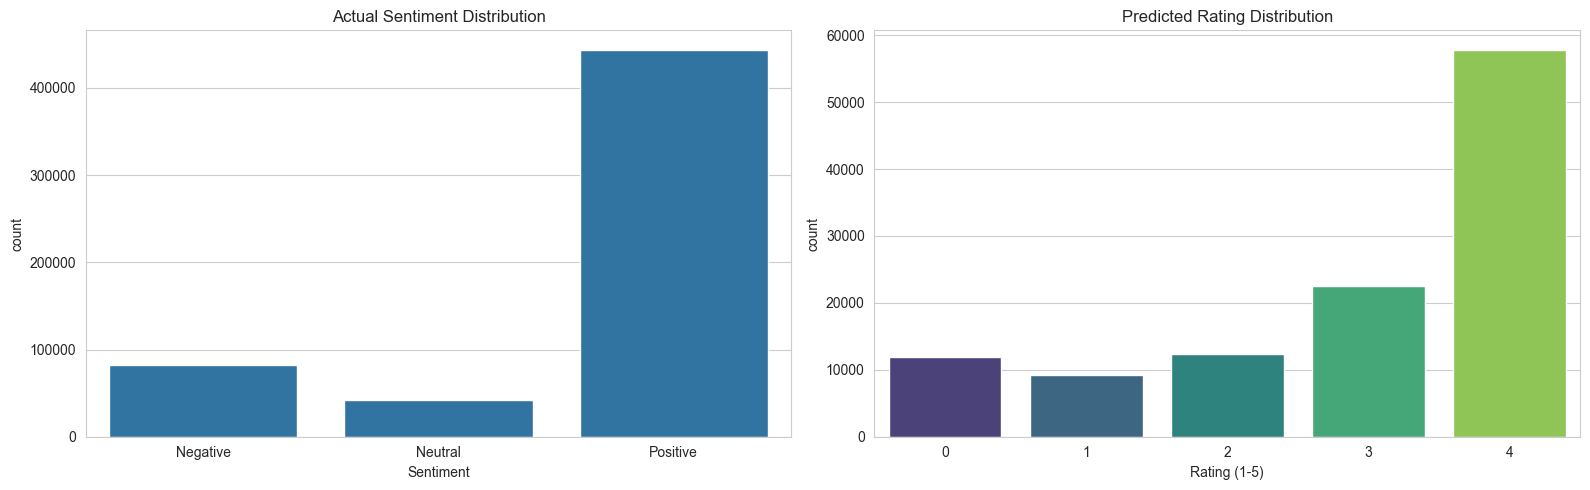

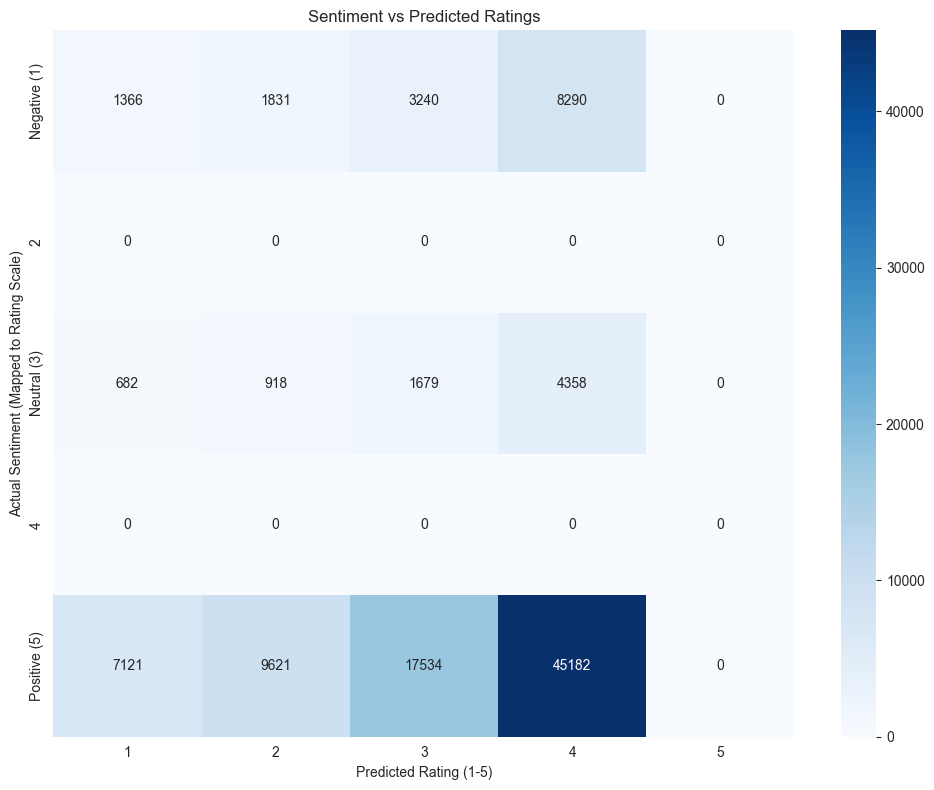

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 1. Distribution Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Actual Sentiment Distribution
sns.countplot(x='Sentiment', data=df, order=['Negative', 'Neutral', 'Positive'], ax=ax1)
ax1.set_title('Actual Sentiment Distribution')

# Predicted Ratings Distribution
sns.countplot(x=y_pred, ax=ax2, palette='viridis')
ax2.set_title('Predicted Rating Distribution')
ax2.set_xlabel('Rating (1-5)')

plt.tight_layout()
plt.show()

# 2. Confusion Matrix (Sentiment vs Predicted Ratings)
plt.figure(figsize=(10, 8))

# Convert sentiment to numeric for comparison
sentiment_map = {'Negative': 1, 'Neutral': 3, 'Positive': 5}  # Mapping to approximate rating scale
y_test_rating = y_test.map(sentiment_map)

cm = confusion_matrix(y_test_rating, y_pred, labels=[1, 2, 3, 4, 5])
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=range(1, 6),
            yticklabels=['Negative (1)', '2', 'Neutral (3)', '4', 'Positive (5)'])
plt.title('Sentiment vs Predicted Ratings')
plt.xlabel('Predicted Rating (1-5)')
plt.ylabel('Actual Sentiment (Mapped to Rating Scale)')
plt.tight_layout()
plt.show()

Model Saving: Store trained models for future use.

In [ ]:
import os
from joblib import dump

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

# Save models with full paths
models_dir = os.path.join(os.getcwd(), 'saved_models')
os.makedirs(models_dir, exist_ok=True)

# Save the models with full paths
sentiment_model_path = os.path.join(models_dir, 'sentiment_model.joblib')
rating_model_path = os.path.join(models_dir, 'rating_model.joblib')
tfidf_path = os.path.join(models_dir, 'tfidf_vectorizer.joblib')

# Save the models
dump(logreg, sentiment_model_path)
dump(rating_model, rating_model_path)
dump(tfidf, tfidf_path)

print(f"Models saved to: {models_dir}")
print(os.listdir(models_dir))




#TO LOAD THE MODELS LATER
# from joblib import load

# Load the models
# sentiment_model = load(sentiment_model_path)
# rating_model = load(rating_model_path)
# tfidf_vectorizer = load(tfidf_path)

Current working directory: c:\Users\Vedant\Desktop\Project\Amazon review
Models saved to: c:\Users\Vedant\Desktop\Project\Amazon review\saved_models
['rating_model.joblib', 'sentiment_model.joblib', 'tfidf_vectorizer.joblib']


In [3]:
# Keep only the required columns and save to a new file
df[['Score', 'Summary', 'Text']].to_csv('Filtered_Reviews.csv', index=False)
print("File saved as 'Filtered_Reviews.csv'")

File saved as 'Filtered_Reviews.csv'
